In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
df=pd.read_csv('/content/gdrive/My Drive/Seaborn/vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Checking Maximum Year**

In [6]:
year_data = df['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


In [7]:
max_entry = year_data.idxmax()
max_entry = df.iloc[max_entry]
pd.DataFrame(max_entry).T

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0,0,0.02,0.29


In [8]:
df['Year'] = df['Year'].replace(2020.0, 2009.0)
print("Max Year Value: ", year_data.max())

Max Year Value:  2017.0


**check the number of games (rows) and the number of unique publishers, platforms and genres to get an idea of how our the games in the dataset are distributed categorically.**

In [9]:
print("Number of games: ", len(df))
publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


In [10]:
print(df.isnull().sum()) # checking for null values available in Data
df = df.dropna() #Dropping NA Vales

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


**Used column chart to represent the total 'Global_Sales' of video games per year in Millions.**

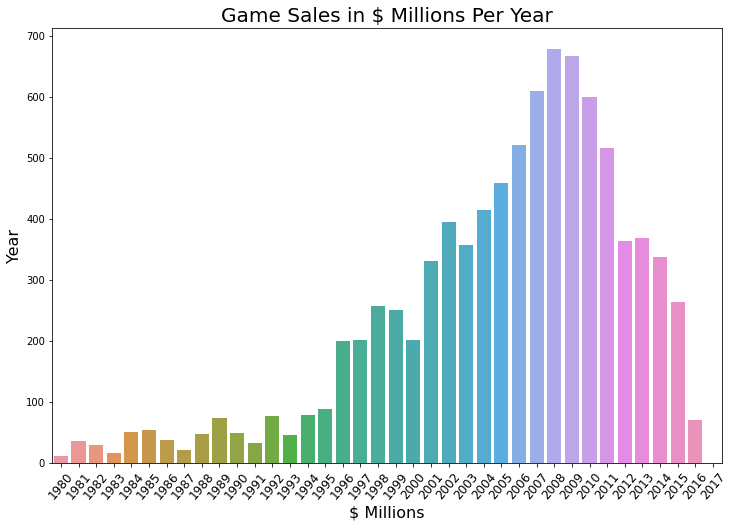

In [11]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

**barplot of the Global Sales generated by the game that makes the most money each year. **

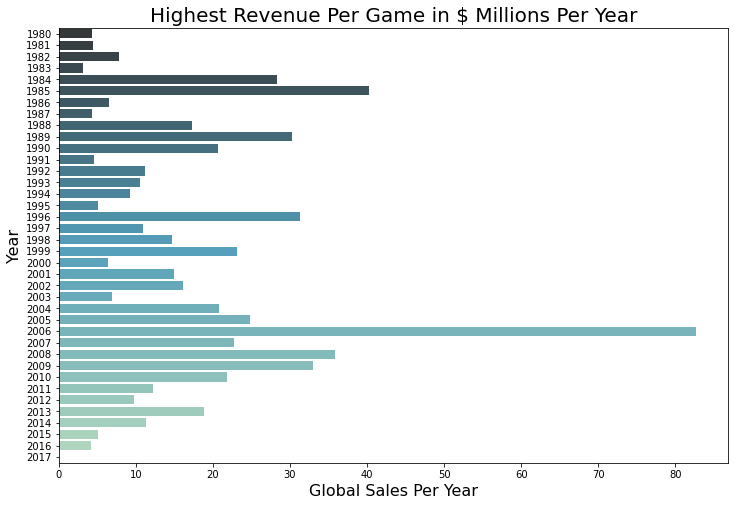

In [13]:
table = df.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Global Sales']


colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show();
#data

**the top 10 publishers by the number of games they have released and the total sales generated using Count()**

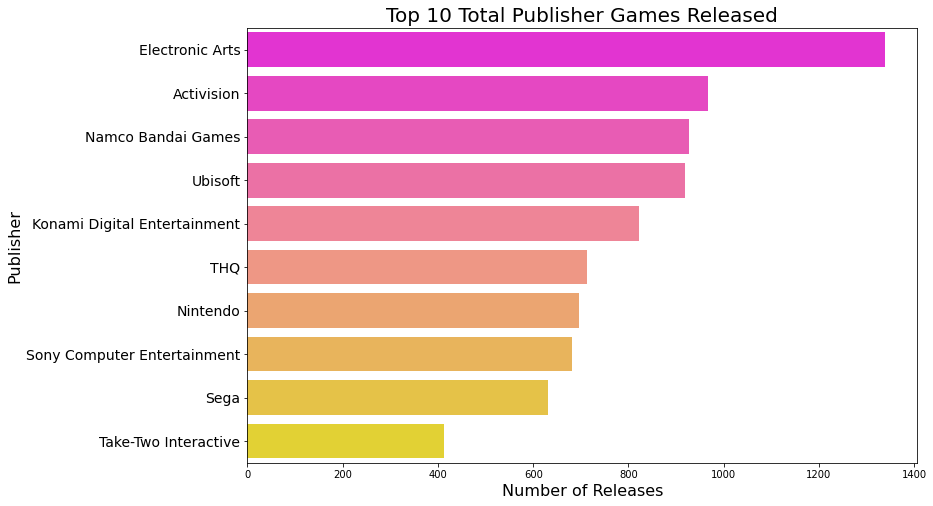

In [19]:
data = df.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("spring", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

**the top 10 publishers by the number of games they have released and the total sales generated using sum()**

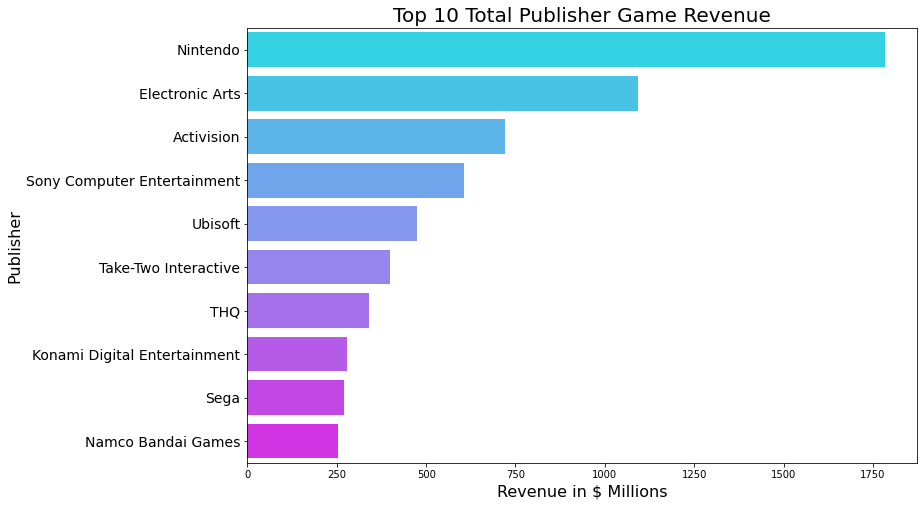

In [16]:
data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Global Sales']

colors = sns.color_palette("cool", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

**distribution of game sales by region.**

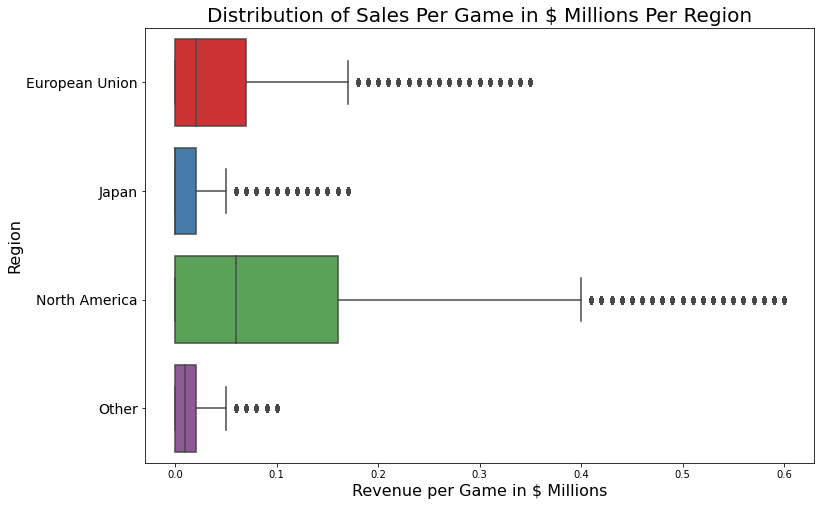

In [20]:
data = df
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

**distribution of game sales for every year from 1980-2017**

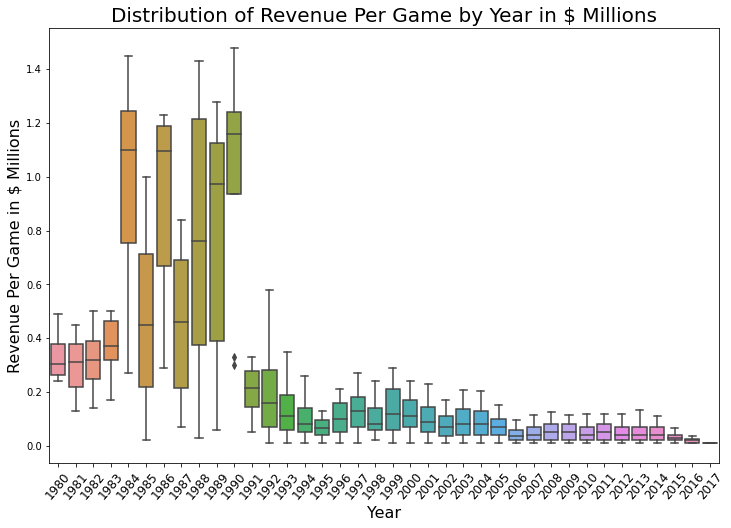

In [23]:
table = df.pivot_table('Global_Sales', columns='Year', index='Name')
q = table.quantile(0.50) #Can Set any no. in range of quantile
data = table[table < q]
years = table.columns.astype(int)

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue Per Game in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Revenue Per Game by Year in $ Millions', fontsize=20)
plt.show()
#plt.show()

**create a pointplot of total sales by region per year.**

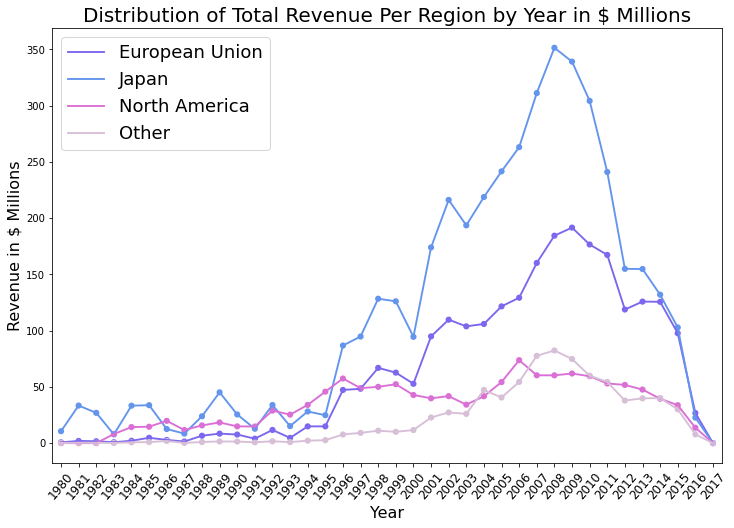

In [24]:
EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

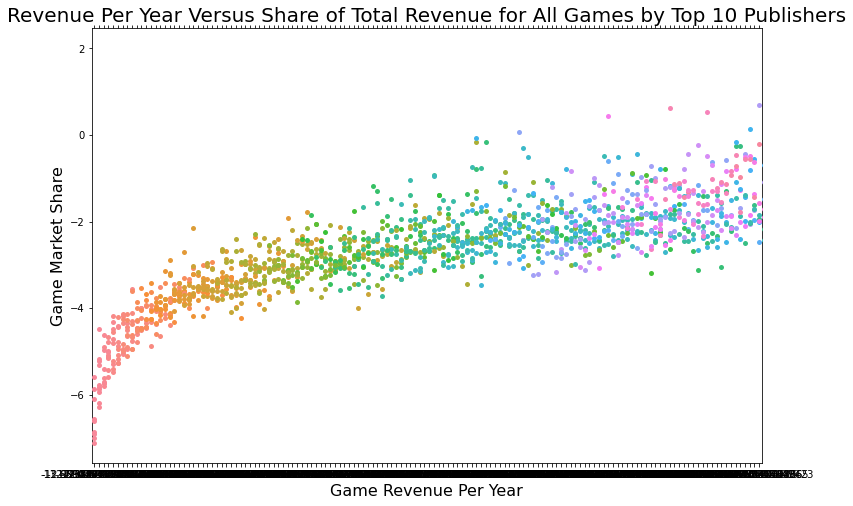

In [29]:
rpy = df['Global_Sales'] / (2017 - df['Year'])
ms = df['Global_Sales'] / df['Global_Sales'].sum()
df['RevPG'] = rpy
df['MktShr'] = ms

data1 = df.pivot_table('MktShr', columns='Publisher', index='Global_Sales')
data2 = df.pivot_table('RevPG', columns='Publisher', index='Global_Sales')

EA1 = data1['Electronic Arts']
Act1 = data1['Activision']
Ubi1 = data1['Ubisoft']
Nint1 = data1['Nintendo']
Sony1 = data1['Sony Computer Entertainment']
Tktwo1 = data1['Take-Two Interactive']
Namc1 = data1['Namco Bandai Games']
Kona1 = data1['Konami Digital Entertainment']
THQ1 = data1['THQ']
Seg1 = data1['Sega']

lizt1 = [EA1, Act1, Ubi1, Nint1, Sony1, Tktwo1, Namc1, Kona1, THQ1, Seg1]
data1 = pd.concat(lizt1, ignore_index=True, axis=1)
data1.columns = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Namco Bandai Games', 'Konami Digital Entertainment', 'THQ', 'Sega']
data1.index = range(0, len((data1)))

EA2 = data2['Electronic Arts']
Act2 = data2['Activision']
Ubi2 = data2['Ubisoft']
Nint2 = data2['Nintendo']
Sony2 = data2['Sony Computer Entertainment']
Tktwo2 = data2['Take-Two Interactive']
Namc2 = data2['Namco Bandai Games']
Kona2 = data2['Konami Digital Entertainment']
THQ2 = data2['THQ']
Seg2 = data2['Sega']

lizt2 = [EA2, Act2, Ubi2, Nint2, Sony2, Tktwo2, Namc2, Kona2, THQ2, Seg2]
data2 = pd.concat(lizt2, ignore_index=True, axis=1)
data2.columns = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Namco Bandai Games', 'Konami Digital Entertainment', 'THQ', 'Sega']
data2.index = range(0, len((data1)))

fig = plt.figure(figsize=(12,8))
ax = sns.swarmplot(x=np.log(data1['Activision']), y=np.log(data2['Activision']), label='Activision')
ax = sns.swarmplot(x=np.log(data1['Ubisoft']), y=np.log(data2['Ubisoft']), label='Ubisoft')
ax = sns.swarmplot(x=np.log(data1['Nintendo']), y=np.log(data2['Nintendo']), label='Nintendo')
ax = sns.swarmplot(x=np.log(data1['Take-Two Interactive']), y=np.log(data2['Take-Two Interactive']), label='Take=Two Interactive')
ax = sns.swarmplot(x=np.log(data1['Sony Computer Entertainment']), y=np.log(data2['Sony Computer Entertainment']), label='Sony Computer Entertainment')
ax = sns.swarmplot(x=np.log(data1['Electronic Arts']), y=np.log(data2['Electronic Arts']), label='Electronic Arts')
ax = sns.swarmplot(x=np.log(data1['Namco Bandai Games']), y=np.log(data2['Namco Bandai Games']), label='Namco Bandai Games')
ax = sns.swarmplot(x=np.log(data1['Konami Digital Entertainment']), y=np.log(data2['Konami Digital Entertainment']), label='Konami Digital Entertainment')
ax = sns.swarmplot(x=np.log(data1['THQ']), y=np.log(data2['THQ']), label='THQ')
ax = sns.swarmplot(x=np.log(data1['Sega']), y=np.log(data2['Sega']), label='Sega')



ax.set_xlabel(xlabel='Game Revenue Per Year', fontsize=16)
ax.set_ylabel(ylabel='Game Market Share', fontsize=16)
ax.set_title(label='Revenue Per Year Versus Share of Total Revenue for All Games by Top 10 Publishers', fontsize=20)

plt.tick_params(axis='x', which='both', bottom='off',
                top='off', labelbottom='off')
#ax.set_xticklabels(labels='', fontsize=12, rotation=50)

plt.show();

**Distribution of market share for Game publisher**

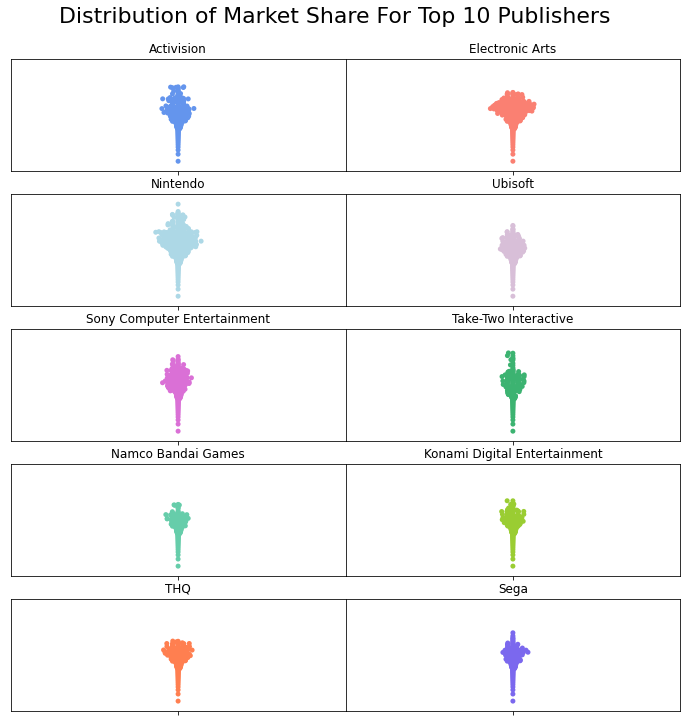

In [30]:
act = data1['Activision']
EA = data1['Electronic Arts']
ubi = data1['Ubisoft']
nint = data1['Nintendo']
sony = data1['Sony Computer Entertainment']
tktwo = data1['Take-Two Interactive']
Namc = data1['Namco Bandai Games']
Kona = data1['Konami Digital Entertainment']
THQ = data1['THQ']
Seg = data1['Sega']

act = np.log(act)
EA = np.log(EA)
ubi = np.log(ubi)
nint = np.log(nint)
sony = np.log(sony)
tktwo = np.log(tktwo)
Namc = np.log(Namc)
Kona = np.log(Kona)
THQ = np.log(THQ)
Seg = np.log(Seg)

min1 = nint.min() - 1
max1 = nint.max() + 1

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(5,2,1)

sns.swarmplot(y=act, color='cornflowerblue')
plt.title('Activision', size=12)
ax1.set_ylim([min1,max1])
y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)

ax2 = fig.add_subplot(5,2,2)
sns.swarmplot(y=EA, color='salmon')
plt.title('Electronic Arts', size=12)
ax2.set_ylim([min1,max1])
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)

ax3 = fig.add_subplot(5,2,3)
sns.swarmplot(y=nint, color='lightblue')
plt.title('Nintendo', size=12)
ax3.set_ylim([min1,max1])
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)

ax4 = fig.add_subplot(5,2,4)
sns.swarmplot(y=ubi, color='thistle')
plt.title('Ubisoft', size=12)
ax4.set_ylim([min1,max1])
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)

ax5 = fig.add_subplot(5,2,5)
sns.swarmplot(y=sony, color='orchid')
plt.title('Sony Computer Entertainment', size=12)
ax5.set_ylim([min1,max1])
y_axis = ax5.axes.get_yaxis()
y_axis.set_visible(False)

ax6 = fig.add_subplot(5,2,6)
sns.swarmplot(y=tktwo, color='mediumseagreen')
ax6.set_ylim([min1,max1])
y_axis = ax6.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Take-Two Interactive', size=12)

ax7 = fig.add_subplot(5,2,7)
sns.swarmplot(y=Namc, color='mediumaquamarine')
ax7.set_ylim([min1,max1])
y_axis = ax7.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Namco Bandai Games', size=12)

ax8 = fig.add_subplot(5,2,8)
sns.swarmplot(y=Kona, color='yellowgreen')
ax8.set_ylim([min1,max1])
y_axis = ax8.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Konami Digital Entertainment', size=12)

ax9 = fig.add_subplot(5,2,9)
sns.swarmplot(y=THQ, color='coral')
ax9.set_ylim([min1,max1])
y_axis = ax9.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('THQ', size=12)

ax10 = fig.add_subplot(5,2,10)
sns.swarmplot(y=Seg, color='mediumslateblue')
ax10.set_ylim([min1,max1])
y_axis = ax10.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Sega', size=12)
plt.suptitle('Distribution of Market Share For Top 10 Publishers', size=22, x=0.5, y=0.94)
plt.subplots_adjust(wspace=0)
plt.show();